In [38]:
import pandas as pd
from auto_matcher.utils import reduce_and_add_match


FP_ZERO_SHOT_RESULTS = "../playground/few_shot_ops_gpt_4o.csv"
FP_HISTORICAL_MATCHING = "../historical_data/all_to_OMOP_Mapping.csv"

In [39]:
df_history = pd.read_csv(FP_HISTORICAL_MATCHING)
df_pred = pd.read_csv(FP_ZERO_SHOT_RESULTS)

In [40]:
df_history.head()

,source_table,source_column,target_table,target_column
0,ADMISSIONS,SUBJECT_ID,VISIT_OCCURRENCE,person_id
1,ADMISSIONS,HADM_ID,VISIT_OCCURRENCE,visit_occurrence_id
2,ADMISSIONS,ADMITTIME,VISIT_OCCURRENCE,visit_start_datetime
3,ADMISSIONS,DISCHTIME,VISIT_OCCURRENCE,visit_end_datetime
4,ADMISSIONS,DEATHTIME,NaN,NaN


In [42]:
df_pred.head()

,source_table,source_column,target_table_pred,target_table_column_pred,n_shots
0,ADMISSIONS,SUBJECT_ID,person,person_id,1
1,ADMISSIONS,HADM_ID,visit_occurrence,visit_occurrence_id,1
2,ADMISSIONS,ADMITTIME,visit_occurrence,visit_start_datetime,1
3,ADMISSIONS,DISCHTIME,visit_occurrence,visit_end_datetime,1
4,ADMISSIONS,DEATHTIME,death,death_datetime,1


In [43]:
df_temp = df_pred[df_pred.n_shots == n_shot]
del df_temp["n_shots"]

In [44]:
dict_op = dict()
for n_shot in range(1, max(df_pred.n_shots) + 1):
    df_temp = df_pred[df_pred.n_shots == n_shot]
    del df_temp["n_shots"]
    df_history.columns = [
        "source_table",
        "source_column",
        "target_table_true",
        "target_column_true",
    ]
    df_temp.columns = [
        "source_table",
        "source_column",
        "target_table_pred",
        "target_column_pred",
    ]
    df_match = df_history.merge(
        df_temp,
        on=["source_table", "source_column"],
        how="left",
        suffixes=("_true", "_pred"),
    ).fillna("none")
    df_output = reduce_and_add_match(df_match, with_confidence=False)
    dict_op[n_shot] = sum(df_output.match_type == "Type1")

2024-09-04 11:30:25.263 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 238, 'Type5': 181, 'Type1': 84}
2024-09-04 11:30:25.272 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 257, 'Type5': 181, 'Type1': 65}
2024-09-04 11:30:25.279 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 232, 'Type5': 181, 'Type1': 90}
2024-09-04 11:30:25.295 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 216, 'Type5': 181, 'Type1': 106}
2024-09-04 11:30:25.301 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 214, 'Type5': 181, 'Type1': 108}
2024-09-04 11:30:25.307 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 215, 'Type5': 181, 'Type1': 107}
2024-09-04 11:30:25.312 | SUCCESS  | auto_matcher.utils:reduce_and_add_match:126 - ValueCounts for Types:{'Type2': 

Text(0.5, 0, 'Number of Shots')

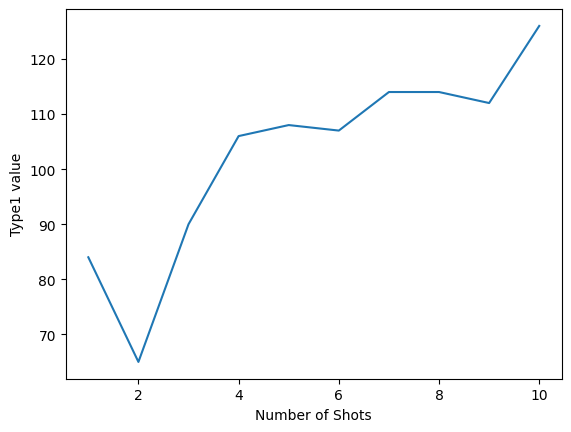

In [45]:
import matplotlib.pyplot as plt

pd.Series(dict_op).plot()
plt.ylabel("Type1 value")
plt.xlabel("Number of Shots")